# OpenStreetMap

* It is an crowd-sourced dataset
* It contains data about streets, buildings, services, landuse etc.
* **OSMnx** is a package used to retrieve, construct, analyze and visualize street networks from OpenStreetMap and also retrieve data about points of interest such as restaurants, schools and lots of different kind of services.
* It is also easy to conduct network routing based on walking, cycling or driving by combining OSMnx functionalities with a package called **NetworkX**

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt

In [37]:
#place_name = "Togo, Africa"
place_name = {18.5786832,73.7666697}

In [38]:
graph = ox.graph_from_point(place_name,dist=750,dist_type='bbox',network_type="drive")

EmptyOverpassResponse: There are no data elements in the response JSON

In [31]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

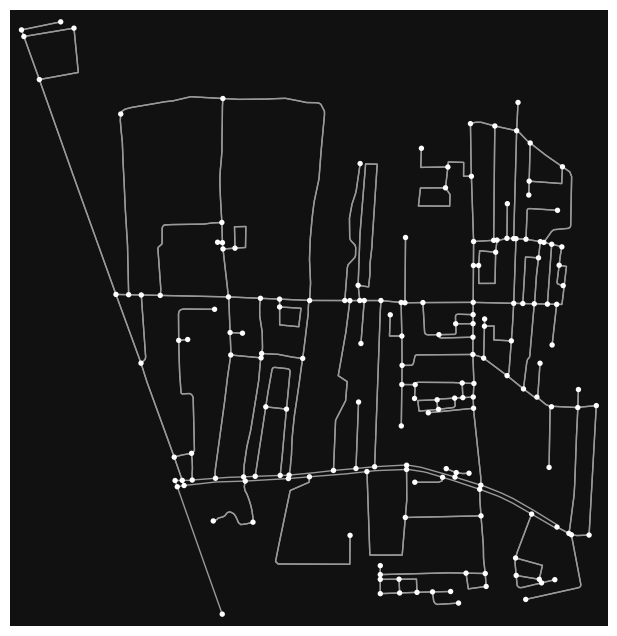

In [32]:
fig, ax = ox.plot_graph(graph)

In [33]:
nodes, edges = ox.graph_to_gdfs(graph)

In [34]:
nodes.head()

,y,x,street_count,geometry
osmid,,,,
652724178,18.574935,73.763832,4,POINT (73.76383 18.57493)
652724182,18.574981,73.764610,3,POINT (73.76461 18.57498)
763423062,18.571967,73.764768,3,POINT (73.76477 18.57197)
871491336,18.574828,73.770821,4,POINT (73.77082 18.57483)
1377773005,18.574932,73.763664,3,POINT (73.76366 18.57493)


In [35]:
edges.head()

osmid  oneway      highway  \
u         v          key                                                
652724178 7984103956 0                 669050753   False      primary   
          6262990166 0                 669050753   False      primary   
          6305085563 0                  73533877    True    secondary   
652724182 4676484316 0                  73533877    True    secondary   
          7983557257 0    [250171874, 223437750]   False  residential   

                               reversed   length                name  \
u         v          key                                               
652724178 7984103956 0            False   13.448                 NaN   
          6262990166 0             True   60.618                 NaN   
          6305085563 0            False   24.596   Moze College Road   
652724182 4676484316 0            False   69.380   Moze College Road   
          7983557257 0    [False, True]  306.812  Echinus Court Road   

                                                                   geometry  \
u         v          key                                                      
652724178 7984103956 0    LINESTRING (73.76383 18.57493, 73.76387 18.57482)   
          6262990166 0    LINESTRING (73.76383 18.57493, 73.76364 18.57545)   
          6305085563 0    LINESTRING (73.76383 18.57493, 73.76402 18.574...   
652724182 4676484316 0    LINESTRING (73.76461 18.57498, 73.76493 18.575...   
          7983557257 0    LINESTRING (73.76461 18.57498, 73.76460 18.575...   

                         access lanes  ref maxspeed  
u         v          key                             
652724178 7984103956 0      NaN   NaN  NaN      NaN  
          6262990166 0      NaN   NaN  NaN      NaN  
          6305085563 0      NaN   NaN  NaN      NaN  
652724182 4676484316 0      NaN   NaN  NaN      NaN  
          7983557257 0      yes   NaN  NaN      NaN

In [36]:
area = ox.geocode_to_gdf(place_name)

ValueError: each query must be a dict or a string

In [28]:
type(area)

NameError: name 'area' is not defined

In [ ]:
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((74.91434 26.83563, 74.91534 26.83465...",27.860562,26.440461,76.285428,74.914344,298175590,relation,1950062,27.150677,75.747016,"Jaipur, Rajasthan, India",boundary,administrative,0.671968


<AxesSubplot: >

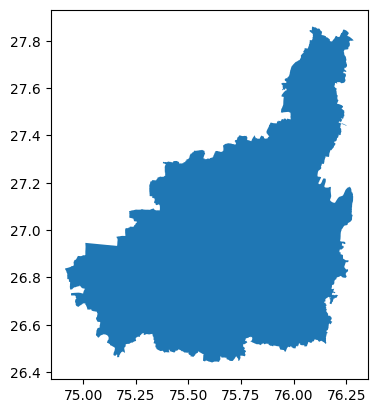

In [ ]:
area.plot()

In [25]:
tags = {"building":True}

In [26]:
buildings = ox.geometries_from_place(place_name,tags)

TypeError: query must be dict, string, or list of strings

In [ ]:
len(buildings)

32708

In [ ]:
buildings.head()

nodes  \
element_type osmid                                                          
way          383032803  [3862350688, 3862350689, 3862350690, 386235069...   
             383032804  [3862350692, 3862350693, 3862350694, 386235069...   
             383032805  [3862350696, 3862350697, 3862350698, 386235069...   
             383032806  [3862350700, 3862350701, 3862350702, 386235070...   
             383032807  [3862350704, 3862350705, 3862350706, 386235070...   

                           building  \
element_type osmid                    
way          383032803  residential   
             383032804  residential   
             383032805  residential   
             383032806  residential   
             383032807  residential   

                                                                 geometry  \
element_type osmid                                                          
way          383032803  POLYGON ((75.82021 26.78322, 75.82020 26.78289...   
             383032804  POLYGON ((75.82045 26.78350, 75.82042 26.78332...   
             383032805  POLYGON ((75.82068 26.78322, 75.82084 26.78320...   
             383032806  POLYGON ((75.82069 26.78321, 75.82085 26.78319...   
             383032807  POLYGON ((75.82068 26.78297, 75.82079 26.78295...   

                       area barrier currency:INR layer name payment:cash  \
element_type osmid                                                         
way          383032803  NaN     NaN          NaN   NaN  NaN          NaN   
             383032804  NaN     NaN          NaN   NaN  NaN          NaN   
             383032805  NaN     NaN          NaN   NaN  NaN          NaN   
             383032806  NaN     NaN          NaN   NaN  NaN          NaN   
             383032807  NaN     NaN          NaN   NaN  NaN          NaN   

                       payment:fasttag  ... name:tg name:fr motor_vehicle  \
element_type osmid                      ...                                 
way          383032803             NaN  ...     NaN     NaN           NaN   
             383032804             NaN  ...     NaN     NaN           NaN   
             383032805             NaN  ...     NaN     NaN           NaN   
             383032806             NaN  ...     NaN     NaN           NaN   
             383032807             NaN  ...     NaN     NaN           NaN   

                       architect historic:civilization outdoor_seating  \
element_type osmid                                                       
way          383032803       NaN                   NaN             NaN   
             383032804       NaN                   NaN             NaN   
             383032805       NaN                   NaN             NaN   
             383032806       NaN                   NaN             NaN   
             383032807       NaN                   NaN             NaN   

                       location parking changing_table toilets:disposal  
element_type osmid                                                       
way          383032803      NaN     NaN            NaN              NaN  
             383032804      NaN     NaN            NaN              NaN  
             383032805      NaN     NaN            NaN              NaN  
             383032806      NaN     NaN            NaN              NaN  
             383032807      NaN     NaN            NaN              NaN  

[5 rows x 132 columns]

In [ ]:
buildings.shape

(32708, 132)

In [ ]:
# List key-value pairs for tags
tags = {"amenity":"restaurant"}

In [ ]:
# Retrieve restaurants
restaurants = ox.geometries_from_place(place_name, tags)

# How many restaurants do we have?
len(restaurants)

127

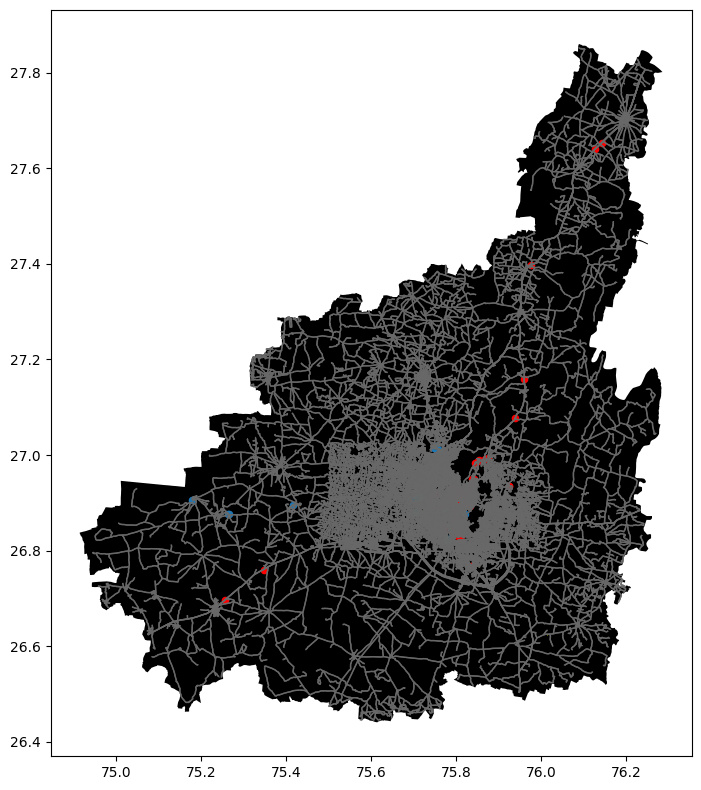

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the footprint
area.plot(ax=ax, facecolor="black")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray",alpha=0.9)

# Plot buildings
buildings.plot(ax=ax, facecolor="yellow", markersize=20)

# Plot restaurants
restaurants.plot(ax=ax, color="red", markersize=20)
plt.tight_layout()